### MLP for regression

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adamax
import matplotlib.pyplot as plt
from IPython import display
import numpy as np
import pandas as pd

### Load the data

In [2]:
fruits = pd.read_csv('fruit_data_with_colors.csv')

In [3]:
fruits

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79
5,2,mandarin,mandarin,80,5.8,4.3,0.77
6,2,mandarin,mandarin,80,5.9,4.3,0.81
7,2,mandarin,mandarin,76,5.8,4.0,0.81
8,1,apple,braeburn,178,7.1,7.8,0.92
9,1,apple,braeburn,172,7.4,7.0,0.89


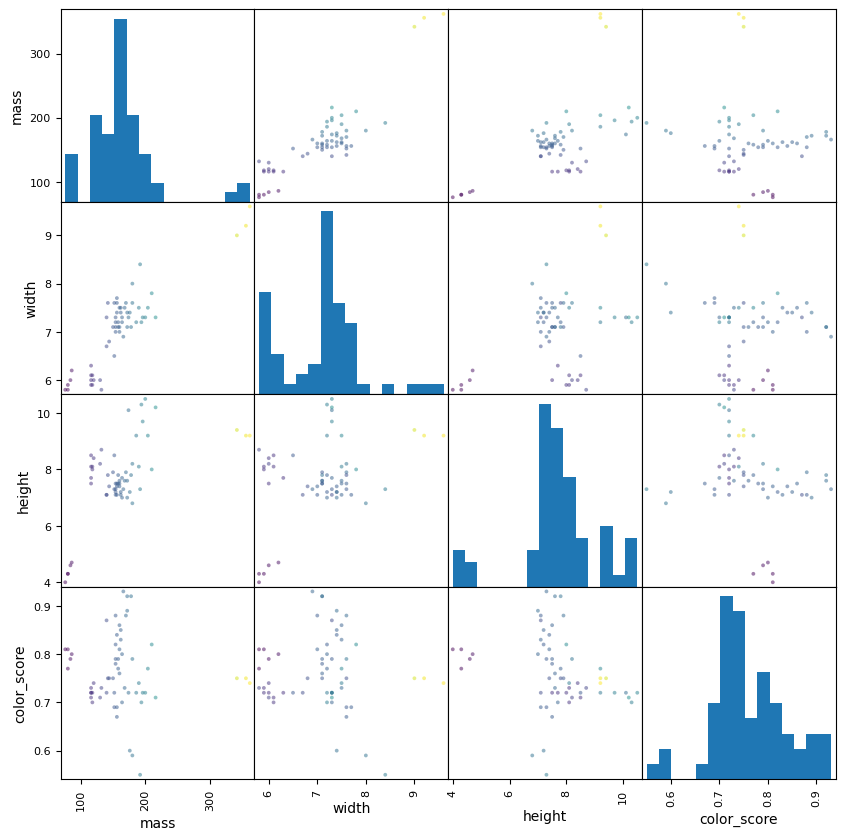

In [4]:
X = fruits.iloc[:,1:]
Y = fruits['mass']
scatter = pd.plotting.scatter_matrix(X, c= Y, marker = '.', s=30, hist_kwds={'bins':15}, figsize=(10,10))

In [5]:
from sklearn.model_selection import train_test_split
X = fruits[['width', 'height', 'color_score']].values
Y = fruits['mass'].values
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

create a validation set

In [6]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=0)
print('train:', x_train.shape, y_train.shape)
print('validation:', x_val.shape, y_val.shape)
print('test:', x_test.shape, y_test.shape)

train: (42, 3) (42,)
validation: (5, 3) (5,)
test: (12, 3) (12,)


In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_train=scaler.fit_transform(x_train)
x_val=scaler.transform(x_val)
x_test=scaler.transform(x_test)

### Try Linear regression

In [8]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(x_train, y_train)
y_test_pred=LR.predict(x_test)
MSE=np.mean((y_test_pred-y_test)**2)
MAPE=np.mean(np.abs(y_test_pred-y_test)/y_test)
print('Linear regression')
print('MSE', MSE)
print('MAPE', MAPE)

Linear regression
MSE 715.675797079999
MAPE 0.10417241916932324


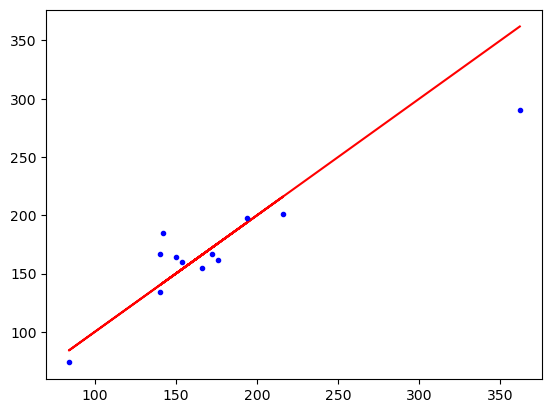

In [9]:
fig, ax=plt.subplots()
ax.plot(y_test, y_test, '-r')#the 45-degree line
ax.plot(y_test, y_test_pred, '.b')

### Define the MLP model

In [10]:
model = Sequential()
model.add(Dense(units=8, activation='softplus', input_shape=(3,)))
model.add(Dense(units=8, activation='softplus'))
model.add(Dense(units=1,  activation='linear')) #use linear for multiclass classification
model.compile(loss='mse', optimizer=Adamax(learning_rate=0.1), metrics=['mape'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 32        
                                                                 
 dense_1 (Dense)             (None, 8)                 72        
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 113 (452.00 Byte)
Trainable params: 113 (452.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
loss_train_list=[]
loss_val_list=[]
mape_train_list=[]
mape_val_list=[]

### Train the model

In [12]:
for epoch in range(0, 200):   
    print('epoch', epoch)
    #set epochs=1
    history=model.fit(x_train, y_train, batch_size=16, epochs=1, validation_data=(x_val, y_val))
    loss_train_list.extend(history.history['loss'])
    loss_val_list.extend(history.history['val_loss'])
    mape_train_list.extend(history.history['mape'])
    mape_val_list.extend(history.history['val_mape'])
    #save the model to a keras file 
    model.save('NN_regression_Keras_sCE_e'+str(epoch)+'.keras')

epoch 0
3/3 [==============================] - 0s 56ms/step - loss: 25907.5527 - mape: 98.7803 - val_loss: 41390.1016 - val_mape: 96.7293
epoch 1
3/3 [==============================] - 0s 20ms/step - loss: 24134.5234 - mape: 94.5905 - val_loss: 37499.7422 - val_mape: 90.8725
epoch 2
3/3 [==============================] - 0s 18ms/step - loss: 20516.3340 - mape: 86.5553 - val_loss: 31519.8242 - val_mape: 81.3235
epoch 3
3/3 [==============================] - 0s 19ms/step - loss: 15630.0029 - mape: 73.8483 - val_loss: 22720.1562 - val_mape: 65.3877
epoch 4
3/3 [==============================] - 0s 18ms/step - loss: 9101.2607 - mape: 51.8392 - val_loss: 11813.2764 - val_mape: 39.5525
epoch 5
3/3 [==============================] - 0s 18ms/step - loss: 2415.9709 - mape: 21.8940 - val_loss: 3855.9062 - val_mape: 17.9233
epoch 6
3/3 [==============================] - 0s 17ms/step - loss: 1902.5592 - mape: 25.7507 - val_loss: 3456.1125 - val_mape: 32.4601
epoch 7
3/3 [==========================

3/3 [==============================] - 0s 24ms/step - loss: 281.9902 - mape: 5.9004 - val_loss: 1466.5658 - val_mape: 10.2146
epoch 61
3/3 [==============================] - 0s 28ms/step - loss: 274.9578 - mape: 5.7829 - val_loss: 1434.9398 - val_mape: 10.3960
epoch 62
3/3 [==============================] - 0s 21ms/step - loss: 272.7136 - mape: 5.7962 - val_loss: 1424.5342 - val_mape: 10.4525
epoch 63
3/3 [==============================] - 0s 33ms/step - loss: 273.1775 - mape: 5.8446 - val_loss: 1393.0430 - val_mape: 10.6481
epoch 64
3/3 [==============================] - 0s 25ms/step - loss: 269.7296 - mape: 5.8855 - val_loss: 1394.7440 - val_mape: 10.6249
epoch 65
3/3 [==============================] - 0s 29ms/step - loss: 266.4765 - mape: 5.7362 - val_loss: 1402.6047 - val_mape: 10.5660
epoch 66
3/3 [==============================] - 0s 25ms/step - loss: 265.9155 - mape: 5.6217 - val_loss: 1415.9115 - val_mape: 10.4786
epoch 67
3/3 [==============================] - 0s 22ms/step - l

3/3 [==============================] - 0s 34ms/step - loss: 231.9196 - mape: 6.2286 - val_loss: 1110.3513 - val_mape: 12.0347
epoch 121
3/3 [==============================] - 0s 40ms/step - loss: 231.8266 - mape: 6.2322 - val_loss: 1114.9337 - val_mape: 11.9654
epoch 122
3/3 [==============================] - 0s 19ms/step - loss: 231.8540 - mape: 6.2171 - val_loss: 1112.9537 - val_mape: 11.9704
epoch 123
3/3 [==============================] - 0s 28ms/step - loss: 231.3700 - mape: 6.2230 - val_loss: 1116.1023 - val_mape: 11.9221
epoch 124
3/3 [==============================] - 0s 35ms/step - loss: 239.5845 - mape: 6.4065 - val_loss: 1137.9270 - val_mape: 11.6980
epoch 125
3/3 [==============================] - 0s 27ms/step - loss: 233.5260 - mape: 6.2275 - val_loss: 1127.9041 - val_mape: 11.7794
epoch 126
3/3 [==============================] - 0s 29ms/step - loss: 228.6703 - mape: 6.1988 - val_loss: 1099.6038 - val_mape: 12.0665
epoch 127
3/3 [==============================] - 0s 31ms/s

3/3 [==============================] - 0s 37ms/step - loss: 225.4938 - mape: 6.4565 - val_loss: 1057.9641 - val_mape: 11.5880
epoch 181
3/3 [==============================] - 0s 30ms/step - loss: 219.9445 - mape: 6.4073 - val_loss: 1031.2979 - val_mape: 11.8736
epoch 182
3/3 [==============================] - 0s 26ms/step - loss: 233.0648 - mape: 6.6713 - val_loss: 1002.3981 - val_mape: 12.3369
epoch 183
3/3 [==============================] - 0s 24ms/step - loss: 231.7639 - mape: 6.7115 - val_loss: 1003.4896 - val_mape: 12.2741
epoch 184
3/3 [==============================] - 0s 26ms/step - loss: 223.7961 - mape: 6.5039 - val_loss: 1031.9092 - val_mape: 11.8038
epoch 185
3/3 [==============================] - 0s 30ms/step - loss: 231.9860 - mape: 6.5081 - val_loss: 1077.3499 - val_mape: 11.3377
epoch 186
3/3 [==============================] - 0s 16ms/step - loss: 226.9325 - mape: 6.4933 - val_loss: 1047.1680 - val_mape: 11.5957
epoch 187
3/3 [==============================] - 0s 27ms/s

### Plot training loss vs epoch and validation loss vs epoch

In [13]:
history.history.keys()

dict_keys(['loss', 'mape', 'val_loss', 'val_mape'])

(0.0, 100.0)

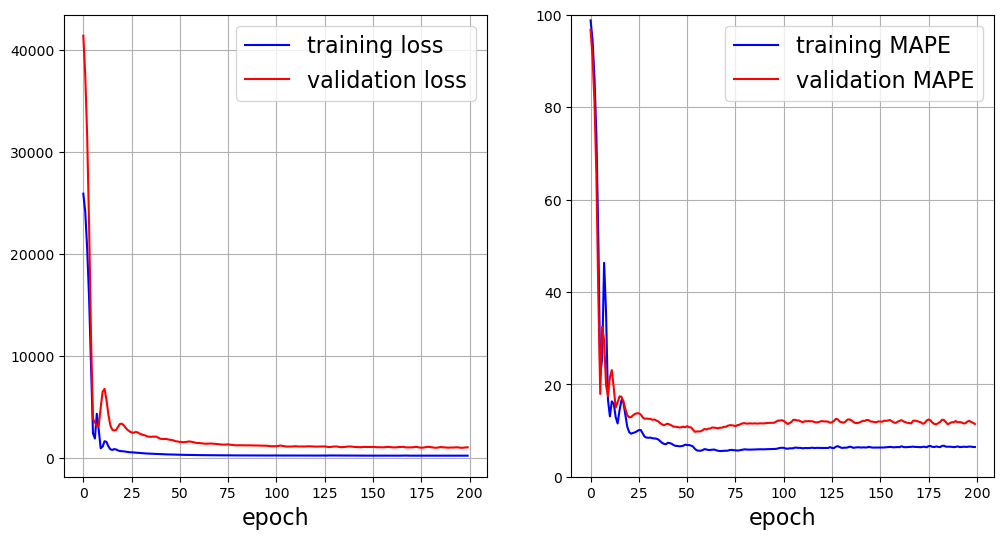

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(12,6))
ax[0].plot(np.arange(0,len(loss_train_list)), loss_train_list, '-b', label='training loss')
ax[0].plot(np.arange(0,len(loss_val_list)), loss_val_list, '-r', label='validation loss')
ax[0].set_xlabel('epoch',fontsize=16)
ax[0].legend(fontsize=16)
ax[0].grid(True)
ax[1].plot(np.arange(0,len(mape_train_list)), mape_train_list, '-b', label='training MAPE')
ax[1].plot(np.arange(0,len(mape_val_list)), mape_val_list, '-r', label='validation MAPE')
ax[1].set_xlabel('epoch',fontsize=16)
ax[1].legend(fontsize=16)
ax[1].grid(True)
ax[1].set_ylim(0,100)

after training, we load the best model

In [15]:
best_idx=np.argmin(mape_val_list)
best_idx

54

In [16]:
from tensorflow.keras.models import load_model
model = load_model('NN_regression_Keras_sCE_e'+str(best_idx)+'.keras')

### Test the model

In [21]:
y_test_pred=model.predict(x_test)

1/1 [==============================] - 0s 18ms/step


In [18]:
MSE=np.mean((y_test_pred-y_test)**2)
MSE

5961.122243135747

In [19]:
MAPE=np.mean(np.abs(y_test_pred-y_test)/y_test)
MAPE

0.3103550299995812

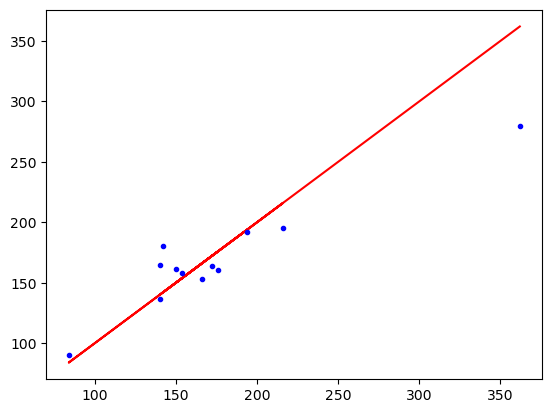

In [20]:
fig, ax=plt.subplots()
ax.plot(y_test, y_test, '-r')#the 45-degree line
ax.plot(y_test, y_test_pred, '.b')